In [1]:
# import packages that we need
import pandas as pd
import numpy as np
import keras
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

from tensorflow.keras.optimizers import RMSprop
from sklearn.utils.class_weight import compute_class_weight

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.models import load_model
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import io
import random
import shutil
from PIL import Image


import time
from tqdm import tqdm

In [2]:
DATADIR = r'C:\Users\Reinaldo\Documents\10 data + model george-20220531T141603Z-001\10 data + model george\img_all_weight_15\img_all_weight_15'
CATEGORIES = os.listdir(r"C:\Users\Reinaldo\Documents\10 data + model george-20220531T141603Z-001\10 data + model george\img_all_weight_15\img_all_weight_15")
#CATEGORIES = ['Abutilon Hybridum','Alpinia Galanga (Rasna)', 'Amaranthus Viridis (Arive-Dantu)', 'Anthurium Scherzerianum', 'Aporocactus Flagelliformis', 'Basella Alba (Basale)', 'Calathea Crocata', 'daisy', 'dandelion', 'Ficus Religiosa (Peepal Tree)', 'Hibiscus rosa-sinensis', 'Lithops fulleri', 'Lithops optica _Rubra_', 'Lithops pseudotruncatella', 'Moringa Oleifera (Drumstick)', 'Nerium Oleander (Oleander)', 'Ocimum Tenuiflorum (Tulsi)', 'Pachystachys Lutea', 'Paphiopedilum Venustum', 'Peperomia Argyela', 'Phalaenopsis amabilis', 'Plectranthus Amboinicus (Mexican Mint)', 'Punica Granatum (Pomegranate)', 'rose', 'Schlumbergera Bridgesii', 'Strelitzia Reginae', 'sunflower', 'Trigonella Foenum-graecum (Fenugreek)', 'tulip', 'Asplenium Nidus', 'Calathea Roseopicta', 'Calathea Zebrina', 'Chlorophytum Comosum', 'Davallia Fejeensis', 'Ficus Auriculata (Roxburgh fig)', 'Mentha (Mint)', 'Nephrolepis Exaltata', 'Opuntia Microdasys', 'Pilea Cadierei', 'Piper Betle (Betel)', 'Santalum Album (Sandalwood)', 'Sedum Morganianum', 'Monstera Deliciosa', 'snow white aglaonema']

In [3]:
source_path = DATADIR

# source_path_dogs = os.path.join(source_path, 'Anthurium Scherzerianum')
# source_path_cats = os.path.join(source_path, 'daisy')


# # os.listdir returns a list containing all files under the given path
# print(f"There are {len(os.listdir(source_path_dogs))} images of Aporocactus Flagelliformis.")
# print(f"There are {len(os.listdir(source_path_cats))} images of Schlumbergera gaertneri.")

In [4]:
# Define root directoryeifera (Drumstick)', 'Nerium Oleander (Oleander)', 'Ocimum Tenuiflorum (Tulsi)', 'Pachystachys Lutea', 'Paphiopedilum Venustum', 'Peperomia Argyela', 'Phalaenopsis amabilis', 'Plectranthus Amboinicus (Mexican Mint)', 'Punica Granatum (Pomegranate)', 'rose', 'Schlumbergera Bridgesii', 'Strelitzia Reginae', 'sunflower', 'Trigonella Foenum-graecum (Fenugreek)', 'tulip', 'Asplenium Nidus', 'Calathea Roseopicta', 'Calathea Zebrina', 'Chlorophytum Comosum', 'Davallia Fejeensis', 'Ficus Auriculata (Roxburgh fig)', 'Mentha (Mint)', 'Nephrolepis Exaltata', 'Opuntia Microdasys', 'Pilea Cadierei', 'Piper Betle (Betel)', 'Santalum Album (Sandalwood)', 'Sedum Morganianum', 'Monstera Deliciosa', 'snow white aglaonema']
root_dir = r'C:\Users\Reinaldo\Documents\Bangkit\DatasetTanamanUtama'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

# GRADED FUNCTION: create_train_test_dirs
def create_train_test_dirs(root_path):

  # Use os.makedirs to create your directories with intermediate subdirectories
  # Don't hardcode the paths. Use os.path.join to append the new directories to the root_path parameter
  train_dir = os.path.join(root_path, 'training')
  os.makedirs(train_dir)
  validation_dir = os.path.join(root_path, 'validation')
  os.makedirs(validation_dir)
  test_dir = os.path.join(root_path, 'testing')
  os.makedirs(test_dir)
  # Directory with training cat/dog pictures
  for tanaman in CATEGORIES:
        os.makedirs(os.path.join(train_dir, tanaman))

  # Directory with validation cat/dog pictures
  for tanaman in CATEGORIES:
        os.makedirs(os.path.join(validation_dir, tanaman))
  for tanaman in CATEGORIES:
        os.makedirs(os.path.join(test_dir, tanaman))


  
try:
  create_train_test_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [5]:
# Test your create_train_test_dirs function

for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

C:\Users\Reinaldo\Documents\Bangkit\DatasetTanamanUtama\testing
C:\Users\Reinaldo\Documents\Bangkit\DatasetTanamanUtama\training
C:\Users\Reinaldo\Documents\Bangkit\DatasetTanamanUtama\validation
C:\Users\Reinaldo\Documents\Bangkit\DatasetTanamanUtama\testing\17_Soleirolia soleirolii
C:\Users\Reinaldo\Documents\Bangkit\DatasetTanamanUtama\testing\20_Gerbera Daisy
C:\Users\Reinaldo\Documents\Bangkit\DatasetTanamanUtama\testing\26_Nymphaea
C:\Users\Reinaldo\Documents\Bangkit\DatasetTanamanUtama\testing\29_Iris  plant
C:\Users\Reinaldo\Documents\Bangkit\DatasetTanamanUtama\testing\30_Lavandula plant
C:\Users\Reinaldo\Documents\Bangkit\DatasetTanamanUtama\testing\Calathea Crocata
C:\Users\Reinaldo\Documents\Bangkit\DatasetTanamanUtama\testing\Calathea Zebrina
C:\Users\Reinaldo\Documents\Bangkit\DatasetTanamanUtama\testing\Chinese Elm Bonsai
C:\Users\Reinaldo\Documents\Bangkit\DatasetTanamanUtama\testing\Haworthiopsis fasciata
C:\Users\Reinaldo\Documents\Bangkit\DatasetTanamanUtama\testing\

In [6]:
# GRADED FUNCTION: split_data
def split_data(SOURCE, TRAINING, VALIDATION, TESTING, SPLIT_SIZE1, SPLIT_SIZE2):

  ### START CODE HERE
  #os.path.getsize(PATH)
    list_name = os.listdir(SOURCE)
    random.sample(list_name, len(list_name))
  


    part1 = int(len(list_name) * SPLIT_SIZE1)
    training_file = list_name[:part1]
    PREtesting_file =list_name[part1:]
    part2 = int(len(PREtesting_file) * SPLIT_SIZE2)
    validation_file = PREtesting_file[:part2]
    testing_file =PREtesting_file[part2:]

    for file in training_file:
        copyfile(os.path.join(SOURCE, file), os.path.join(TRAINING, file))
    for file in validation_file:
        copyfile(os.path.join(SOURCE, file), os.path.join(VALIDATION, file))
    for file in testing_file:
        copyfile(os.path.join(SOURCE, file), os.path.join(TESTING, file))
#      copyfile(SOURCE+file, TESTING+file)

  ### END CODE HERE


In [7]:
TRAINING_DIR = r"C:\Users\Reinaldo\Documents\Bangkit\DatasetTanamanUtama\training"
VALIDATION_DIR = r"C:\Users\Reinaldo\Documents\Bangkit\DatasetTanamanUtama\validation"
TESTING_DIR = r"C:\Users\Reinaldo\Documents\Bangkit\DatasetTanamanUtama\testing"

for tanaman in CATEGORIES:
    if len(os.listdir(os.path.join(TRAINING_DIR, tanaman))) > 0:
        for file in os.scandir(os.path.join(TRAINING_DIR, tanaman)):
            os.remove(file.path)
    if len(os.listdir(os.path.join(VALIDATION_DIR, tanaman))) > 0:
        for file in os.scandir(os.path.join(VALIDATION_DIR, tanaman)):
            os.remove(file.path)
    if len(os.listdir(os.path.join(TESTING_DIR, tanaman))) > 0:
        for file in os.scandir(os.path.join(TESTING_DIR, tanaman)):
            os.remove(file.path)

# Define proportion of images used for training
split_size1 = .9
split_size2 = 1
# Run the function
# NOTE: Messages about zero length images should be printed out
for tanaman in CATEGORIES:
    split_data(os.path.join(source_path, tanaman), os.path.join(TRAINING_DIR, tanaman), os.path.join(VALIDATION_DIR, tanaman), os.path.join(TESTING_DIR, tanaman), split_size1, split_size2)
    


In [8]:
# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
  train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                     rotation_range=20,
                                     width_shift_range=.2,
                                     height_shift_range=.2,
#                                      shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode="nearest")

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32,
                                                      class_mode='categorical',
                                                      target_size=(224, 224), color_mode='rgb')

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale = 1/255.0)

  # Pass in the appropiate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                target_size=(224, 224),
                                                                color_mode='rgb')
  ### END CODE HERE
  return train_generator, validation_generator

In [9]:
def color_segment_function(img_array):
    img_array= np.rint(img_array)
    img_array= img_array.astype('uint8')
    hsv_img= cv2.cvtColor(img_array, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(hsv_img, (24, 50, 0), (55, 255, 255))
    result = cv2.bitwise_and(img_array, img_array, mask=mask)
    result= result.astype('float64')
    return result

In [10]:
test_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=color_segment_function)
test_generator = test_datagen.flow_from_directory(r'C:\Users\Reinaldo\Documents\Bangkit\DatasetTanamanlah\testing',
                                                  target_size=(224, 224),
                                                  batch_size=1,
                                                  class_mode='categorical',
                                                  shuffle=False)

Found 11 images belonging to 1 classes.


In [11]:
# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 10238 images belonging to 17 classes.
Found 1146 images belonging to 17 classes.


In [12]:
class_names = list(train_generator.class_indices.keys())
class_names

['17_Soleirolia soleirolii',
 '20_Gerbera Daisy',
 '26_Nymphaea',
 '29_Iris  plant',
 '30_Lavandula plant',
 'Calathea Crocata',
 'Calathea Zebrina',
 'Chinese Elm Bonsai',
 'Haworthiopsis fasciata',
 'Hibiscus rosa-sinensis',
 'Hypoestes phyllostachya',
 'Kalanchoe thyrsiflora',
 'Lithops',
 'Phalaenopsis amabilis',
 'Sedum Morganianum',
 'Strelitzia Reginae',
 'tulip']

In [13]:
from prettytable import PrettyTable
#get class indices and labels. calculate class weight
label_map = {}
for k, v in train_generator.class_indices.items():
    label_map[v]=k

class_counts= pd.Series(train_generator.classes).value_counts()
class_weight= {}

for i, c in class_counts.items():
    class_weight[i]= 1.0/c
    
norm_factor= np.mean(list(class_weight.values()))

for k in class_counts.keys():
    class_weight[k]= class_weight[k]/norm_factor

t = PrettyTable(['class_index', 'class_label', 'class_weight'])
for i in sorted(class_weight.keys()):
    t.add_row([i, label_map[i], '{:.2f}'.format(class_weight[i])])
print(t)

+-------------+--------------------------+--------------+
| class_index |       class_label        | class_weight |
+-------------+--------------------------+--------------+
|      0      | 17_Soleirolia soleirolii |     1.10     |
|      1      |     20_Gerbera Daisy     |     1.03     |
|      2      |       26_Nymphaea        |     0.82     |
|      3      |      29_Iris  plant      |     0.86     |
|      4      |    30_Lavandula plant    |     0.85     |
|      5      |     Calathea Crocata     |     1.25     |
|      6      |     Calathea Zebrina     |     1.08     |
|      7      |    Chinese Elm Bonsai    |     1.30     |
|      8      |  Haworthiopsis fasciata  |     1.31     |
|      9      |  Hibiscus rosa-sinensis  |     0.89     |
|      10     | Hypoestes phyllostachya  |     0.88     |
|      11     |  Kalanchoe thyrsiflora   |     0.95     |
|      12     |         Lithops          |     1.01     |
|      13     |  Phalaenopsis amabilis   |     1.27     |
|      14     

In [14]:
base_model = tf.keras.applications.MobileNetV2(include_top=False)
base_model.trainable= False

inputs = layers.Input(shape=(224,224,3),name = "input_shape",dtype=tf.float16)
x = base_model(inputs,training=False)
x = layers.GlobalAvgPool2D(name="global_average_pooling_layer")(x)
outputs = layers.Dense(len(class_names),activation='softmax',dtype=tf.float32,name='outputs')(x)

model_2 = Model(inputs,outputs)

model_2.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_shape (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, None, None, 1280)  2257984  
 ional)                                                          
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 outputs (Dense)             (None, 17)                21777     
                                                                 
Total params: 2,279,761
Trainable params: 21,777
Non-trainable params: 2,257,984
_________________________________________________________________


In [15]:
# from tensorflow.keras import layers
# model =  tf.keras.models.Sequential()

# model.add(layers.Conv2D(32, (3, 3), input_shape=(224, 224, 3),padding='Same', activation='relu'))
# model.add(layers.MaxPool2D(pool_size=2 , strides=2))
# model.add(layers.Dropout(0.1))


# model.add(layers.Conv2D(64, (3, 3),padding='Same' , activation='relu'))
# model.add(layers.MaxPool2D(pool_size=2 , strides=2))
# model.add(layers.Dropout(0.1))



# model.add(layers.Conv2D(128, (3, 3),padding='Same', activation='relu'))
# model.add(layers.MaxPool2D(pool_size=2 , strides=2))
# #model.add(layers.Dropout(0.1))


# model.add(layers.Conv2D(128, (3, 3),padding='Same', activation='relu'))
# model.add(layers.MaxPool2D(pool_size=2 , strides=2))
# #model.add(layers.Dropout(0.1))


# model.add(layers.Flatten())
# model.add(layers.Dropout(0.4))
# model.add(layers.Dense(256, activation='relu'))

# model.add(layers.Dense(len(CATEGORIES), activation='softmax'))


# # base_model = tf.keras.applications.MobileNetV2(include_top=False)
# # base_model.trainable= False

# # inputs = layers.Input(shape=(224,224,3),name = "input_shape",dtype=tf.float16)
# # x = base_model(inputs,training=False)
# # x = layers.GlobalAvgPool2D(name="global_average_pooling_layer")(x)
# # #x = layers.Dense(512, activation='relu')(x)
# # outputs = layers.Dense(len(class_names),activation='softmax',dtype=tf.float32,name='outputs')(x)

# # model_2 = Model(inputs,outputs)




In [16]:
# model_2.compile(optimizer=keras.optimizers.Adam(lr=0.001, amsgrad=True),
#                     loss='categorical_crossentropy',
#                     metrics = ['accuracy']) 

In [17]:
# model.summary()

In [18]:
# Opsi callBack1

# class MyThresholdCallback(tf.keras.callbacks.Callback):
#     def __init__(self, threshold):
#         super(MyThresholdCallback, self).__init__()
#         self.threshold = threshold

#     def on_epoch_end(self, epoch, logs=None): 
#         val_acc = logs["val_loss"]
#         if val_acc <= self.threshold:
#             self.model.stop_training = True

# # callback_model2 = ModelCheckpoint("checkpoint_all/model2_45Data_trad.h5")

# my_callback = MyThresholdCallback(threshold=0.5)

In [19]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",  
                                                 factor=0.2, # multiply the learning rate by 0.2 (reduce by 5x)
                                                 patience=2,
                                                 verbose=1, # print out when learning rate goes down 
                                                 min_lr=1e-7)

In [20]:
def scheduler(epoch, lr):
  if epoch <= 50:
    return lr
  else:
    return lr * tf.math.exp(-0.2)

lr_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [21]:
chckp = tf.keras.callbacks.ModelCheckpoint("./model_best.h5", monitor='val_accuracy', mode='max', save_best_only=True )

In [22]:
# Opsi callBack2
# best_cb= callbacks.ModelCheckpoint('model_best29Mei.h5', 
#                                          monitor='val_loss', 
#                                          verbose=1, 
#                                          save_best_only=True, 
#                                          save_weights_only=False, 
#                                          mode='auto', 
#                                          period=1)

In [23]:
history_model2 = model_2.fit(train_generator,
                                 epochs=5,
                                 steps_per_epoch=len(train_generator),
                                 validation_data=validation_generator,
                                 validation_steps=int(0.15 * len(validation_generator)), 
                                 callbacks=[lr_callback, chckp],
                             class_weight=class_weight)

Epoch 1/5
320/320 [==============================] - 181s 560ms/step - loss: 0.8616 - accuracy: 0.7376 - val_loss: 0.6578 - val_accuracy: 0.7875 - lr: 0.0010
Epoch 2/5
320/320 [==============================] - 183s 571ms/step - loss: 0.4526 - accuracy: 0.8621 - val_loss: 0.6583 - val_accuracy: 0.7875 - lr: 0.0010
Epoch 3/5
320/320 [==============================] - 178s 555ms/step - loss: 0.3809 - accuracy: 0.8803 - val_loss: 0.5073 - val_accuracy: 0.8250 - lr: 0.0010
Epoch 4/5
320/320 [==============================] - 179s 559ms/step - loss: 0.3337 - accuracy: 0.8955 - val_loss: 0.3691 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 5/5
320/320 [==============================] - 179s 558ms/step - loss: 0.2972 - accuracy: 0.9032 - val_loss: 0.5854 - val_accuracy: 0.8375 - lr: 0.0010


In [24]:
# epochs = 150
# steps_per_epoch = 50
# # Train the model
# # Note that this may take some time.
# history = model_2.fit(train_generator,
#                              class_weight= class_weight,
#                              epochs=20,
#                              steps_per_epoch=steps_per_epoch,
#                              #steps_per_epoch=len(train_generator),
#                              validation_data=validation_generator,
#                              #validation_steps=int(0.15 * len(validation_generator)), 
#                              callbacks=[my_callback])

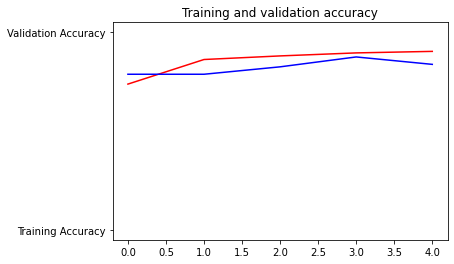

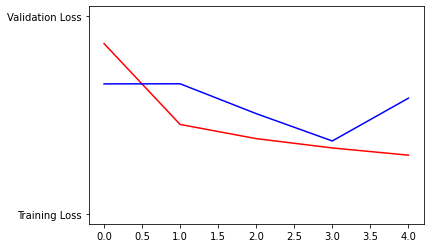

In [27]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history_model2.history['accuracy']
val_acc=history_model2.history['val_accuracy']
loss=history_model2.history['loss']
val_loss=history_model2.history['val_loss']

epochs=range(len(acc)) # Get number of epochs
#------------------------------------------------
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [26]:
model_2.save('model_best_17class.h5')

In [ ]:
tf.saved_model.save(model_2, r'C:\Users\Reinaldo\Documents')

In [ ]:
model_2.save_weights(r'C:\Users\Reinaldo\Documents',save_format = 'h5')

In [ ]:
from keras import models, layers, callbacks
model= models.load_model('model_best5juni.h5')

In [ ]:
test_generator.n

In [ ]:
import cv2
pred= model.predict_generator(test_generator, steps= test_generator.n, verbose=1)

In [ ]:
predicted_class_indices=np.argmax(pred,axis=1)

prediction_labels = [label_map[k] for k in predicted_class_indices]
filenames= test_generator.filenames

In [ ]:
import csv
csvfile= open('ray_reed_submission.csv', 'w', newline='')
writer= csv.writer(csvfile)

headers= ['file', 'species']

writer.writerow(headers)
t = PrettyTable(headers)
for i, f, p in zip(range(len(filenames)), filenames, prediction_labels):
    writer.writerow([os.path.basename(f),p])
    if i <10:
        t.add_row([os.path.basename(f), p])
    elif i<13:
        t.add_row(['.', '.'])
csvfile.close()
print(t)

In [ ]:
def img_prep_predict(path):
    img = plt.imread(path)
    img=tf.image.resize(img,(224,224))
    img=tf.expand_dims(img,axis=0)
    img = img/255.
    predmod = np.ravel(model_2.predict(img))
    a= 0
    nji = 0
    for CATEGORIE in CATEGORIES:
        if predmod[a] > nji:
            mosnt = CATEGORIE
            nji = predmod[a]
        a+=1

    return mosnt

In [ ]:
model_2.evaluate(validation_generator)